<a href="https://colab.research.google.com/github/rkgupta7463/ML-projects-code/blob/main/Multilabel_car_Classifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PIL
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Dropout,BatchNormalization,MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [57]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [58]:
!kaggle datasets download -d julichitai/multilabel-small-car-and-color-dataset

multilabel-small-car-and-color-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [59]:
import zipfile
zip = zipfile.ZipFile("/content/multilabel-small-car-and-color-dataset.zip",'r')
zip.extractall("/content/multilabel-small-car-and-color")
zip.close()

In [60]:
directory=os.path.join('/content/multilabel-small-car-and-color')

In [61]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=40,  # Example: random rotation
    width_shift_range=0.2,  # Example: random horizontal shift
    height_shift_range=0.2,  # Example: random vertical shift
    shear_range=0.2,  # Example: random shear
    zoom_range=0.2,  # Example: random zoom
    horizontal_flip=True,  # Example: random horizontal flip
    fill_mode='nearest'  # Example: how to fill missing pixels
)

In [65]:
seed=1334
train_generator = train_datagen.flow_from_directory(
    directory,
    target_size=(255, 255),  # Resize images to a consistent size
    batch_size=32,
    class_mode='categorical',  # Set the class mode for multi-class classification
    subset='training',  # Training subset
    shuffle=True,  # Shuffle the data
    seed=seed
)

Found 2191 images belonging to 9 classes.


In [66]:
validation_generator = train_datagen.flow_from_directory(
    directory,
    target_size=(255, 255),  # Resize images to a consistent size
    batch_size=32,
    class_mode='categorical',  # Set the class mode for multi-class classification
    subset='validation',  # Validation subset
    shuffle=False,  # Don't shuffle the validation data
    seed=seed
)

Found 544 images belonging to 9 classes.


In [90]:
train_generator.class_indices

{'matiz black': 0,
 'matiz blue': 1,
 'matiz red': 2,
 'rio black': 3,
 'rio blue': 4,
 'rio red': 5,
 'tiggo black': 6,
 'tiggo blue': 7,
 'tiggo red': 8}

### **Now lets start creating CNN Network**

In [67]:
# Initializing the first CNN model
model1 = tf.keras.Sequential()

# Creating the CNN model
model1.add(Conv2D(16, (3, 3), activation='relu', input_shape=(255, 255, 3)))
model1.add(MaxPooling2D(2, 2))
model1.add(Dropout(rate=0.15))  # Adding dropout regularization throughout the model to deal with overfitting

# The second convolution
model1.add(Conv2D(32, (3, 3), activation='relu'))
model1.add(MaxPooling2D(2, 2))
model1.add(Dropout(rate=0.1))

# The third convolution
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(2, 2))
model1.add(Dropout(rate=0.10))

# Flatten the results to feed into a DNN
model1.add(Flatten())

# 512 neuron hidden layer
model1.add(Dense(512, activation='relu'))

# 9 output neurons for the 9 classes
model1.add(Dense(9, activation='softmax'))  # Corrected to 9 output neurons

In [68]:
model1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 253, 253, 16)      448       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 126, 126, 16)      0         
 ng2D)                                                           
                                                                 
 dropout_24 (Dropout)        (None, 126, 126, 16)      0         
                                                                 
 conv2d_26 (Conv2D)          (None, 124, 124, 32)      4640      
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_25 (Dropout)        (None, 62, 62, 32)       

In [69]:
model1.compile(loss="categorical_crossentropy",
               optimizer=Adam(),
               metrics=['accuracy'])

In [70]:
history1=model1.fit(train_generator,validation_data=validation_generator,epochs=50,batch_size=64)

Epoch 1/50
69/69 [==============================] - 53s 736ms/step - loss: 3.0861 - accuracy: 0.2077 - val_loss: 1.5397 - val_accuracy: 0.3419
Epoch 2/50
69/69 [==============================] - 60s 876ms/step - loss: 1.3641 - accuracy: 0.4103 - val_loss: 1.3254 - val_accuracy: 0.4136
Epoch 3/50
69/69 [==============================] - 50s 734ms/step - loss: 1.2508 - accuracy: 0.4669 - val_loss: 1.1088 - val_accuracy: 0.5092
Epoch 4/50
69/69 [==============================] - 50s 733ms/step - loss: 1.2266 - accuracy: 0.4774 - val_loss: 1.0601 - val_accuracy: 0.5018
Epoch 5/50
69/69 [==============================] - 50s 731ms/step - loss: 1.1298 - accuracy: 0.5098 - val_loss: 1.1083 - val_accuracy: 0.4761
Epoch 6/50
69/69 [==============================] - 51s 740ms/step - loss: 1.0907 - accuracy: 0.5258 - val_loss: 1.1831 - val_accuracy: 0.4485
Epoch 7/50
69/69 [==============================] - 59s 861ms/step - loss: 1.0605 - accuracy: 0.5495 - val_loss: 1.0515 - val_accuracy: 0.5515

In [76]:
loss,acc=model1.evaluate(validation_generator)
print("Model1's Accuracy:-",acc)
print("Model1's Loss:-",loss)

17/17 [==============================] - 12s 706ms/step - loss: 0.7954 - accuracy: 0.6949
Model1's Accuracy:- 0.6948529481887817
Model1's Loss:- 0.7953777313232422


In [71]:
import matplotlib.pyplot as plt

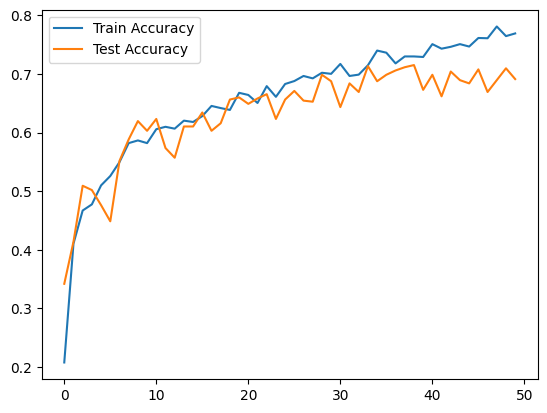

In [74]:
plt.plot(history1.history['accuracy'],label="Train Accuracy")
plt.plot(history1.history['val_accuracy'],label="Test Accuracy")
plt.legend()
plt.show()

In [82]:
# Initializing the first CNN model
model2 = tf.keras.Sequential()

# Creating the CNN model
model2.add(Conv2D(228, (3, 3), activation='relu', input_shape=(255, 255, 3)))
model2.add(MaxPooling2D(2, 2))
model2.add(Dropout(rate=0.15))  # Adding dropout regularization throughout the model to deal with overfitting

# The second convolution
model2.add(Conv2D(144, (3, 3), activation='relu'))
model2.add(MaxPooling2D(2, 2))
model2.add(Dropout(rate=0.1))

# The third convolution
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(2, 2))
model2.add(Dropout(rate=0.10))

# Flatten the results to feed into a DNN
model2.add(Flatten())

# 512 neuron hidden layer
model2.add(Dense(512, activation='relu'))

# 9 output neurons for the 9 classes
model2.add(Dense(9, activation='softmax'))  # Corrected to 9 output neurons

In [83]:
model2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 253, 253, 228)     6384      
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 126, 126, 228)     0         
 ng2D)                                                           
                                                                 
 dropout_33 (Dropout)        (None, 126, 126, 228)     0         
                                                                 
 conv2d_35 (Conv2D)          (None, 124, 124, 144)     295632    
                                                                 
 max_pooling2d_34 (MaxPooli  (None, 62, 62, 144)       0         
 ng2D)                                                           
                                                                 
 dropout_34 (Dropout)        (None, 62, 62, 144)     

In [84]:
model2.compile(loss="categorical_crossentropy",
               optimizer=Adam(),
               metrics=['accuracy'])

In [85]:
history2=model2.fit(train_generator,validation_data=validation_generator,batch_size=64,epochs=25)

Epoch 1/25
69/69 [==============================] - 72s 1s/step - loss: 2.0894 - accuracy: 0.2743 - val_loss: 1.5467 - val_accuracy: 0.3051
Epoch 2/25
69/69 [==============================] - 69s 993ms/step - loss: 1.3544 - accuracy: 0.3642 - val_loss: 1.2582 - val_accuracy: 0.3934
Epoch 3/25
69/69 [==============================] - 69s 989ms/step - loss: 1.2456 - accuracy: 0.4208 - val_loss: 1.1741 - val_accuracy: 0.4228
Epoch 4/25
69/69 [==============================] - 76s 1s/step - loss: 1.1880 - accuracy: 0.4564 - val_loss: 1.0728 - val_accuracy: 0.5092
Epoch 5/25
69/69 [==============================] - 76s 1s/step - loss: 1.1531 - accuracy: 0.4824 - val_loss: 1.0726 - val_accuracy: 0.4706
Epoch 6/25
69/69 [==============================] - 68s 984ms/step - loss: 1.1400 - accuracy: 0.4929 - val_loss: 1.0551 - val_accuracy: 0.5165
Epoch 7/25
69/69 [==============================] - 67s 984ms/step - loss: 1.0751 - accuracy: 0.5272 - val_loss: 0.9630 - val_accuracy: 0.5570
Epoch 8/

In [86]:
loss2,acc2=model2.evaluate(validation_generator)
print("Model 2 loss:-",loss2)
print("Model 2 Accuracy:-",acc2)

17/17 [==============================] - 13s 750ms/step - loss: 0.9101 - accuracy: 0.5956
Model 2 loss:- 0.9101166725158691
Model 2 Accuracy:- 0.595588207244873


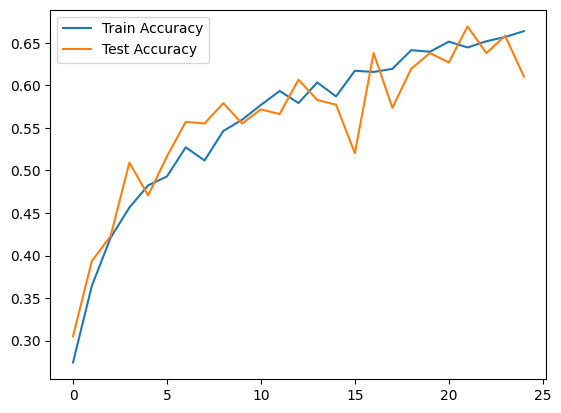

In [87]:
plt.plot(history2.history['accuracy'],label="Train Accuracy")
plt.plot(history2.history['val_accuracy'],label="Test Accuracy")
plt.legend()
plt.suptitle()
plt.show()